# 3.2. Решение линейного стока (с использованием Ei)

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Версия 0.3 от 16.10.2025


---

Содержание

1. [Уравнение фильтрации в радиальной форме ](#321)
2. [Решение линейного стока](#322)
3. [Построение графика решения от расстояния для произвольного момента времени в безразмерных координатах](#323)
4. [Построение графика решения - изменения забойного давления от времени в безразмерных координатах](#324)
5. [Построение графиков решения в размерных координатах](#325)
6. [Построение графиков для разных моментов времени](#326)
7. [Задания для самостоятельной работы](#327)

In [1]:
# импортируем библиотеки для расчетов

# numpy используем для работы с массивами и подготовки данных для построения графиков. 
# Также в некоторых функциях используем возможности векторных расчетов numpy
import numpy as np
# matplotlib используем для построения графиков
import matplotlib.pyplot as plt
# scipy.special используем как альтернативный вариант расчета специальных функций
import scipy.special as sp

# импортируем ранее определенные расчетные функции
import sys
sys.path.append('..') # модуль с функциями располагается на уровень выше скрипта
from welltest import functions as wf

# 1. Уравнение фильтрации в радиальной форме <a class="anchor" id="321"></a>

Уравнение фильтрации для радиального потока в линеаризованном виде можно записать в виде

$$ 
\frac{\partial p}{\partial t} = 0.00036 \dfrac{k}{\phi \mu c_t} \dfrac{1}{r} \left[ \dfrac{\partial}{\partial r} \left( r \dfrac{ \partial p} {\partial r} \right) \right]  
$$

Напомним, здесь
* $p$ - давление, атм
* $t$ - время, час
* $k$ - проницаемость в направлении движения потока, мД
* $\mu$ - динамическая вязкость, сП
* $\phi$ - пористость, д.е.
* $c_t$ - сжимаемость, 1/атм
* $r$ - расстояние от центра, м

Часто для анализа уравнений неустановившейся фильтрации используются безразмерные переменные. Мы будем использовать переменные в виде:

$$ r_D = \frac{r}{r_w} \tag{2} $$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2}  \tag{3}$$
$$ p_D = \frac{kh}{ 18.42 q_s B \mu} \left( p_i - p \right)  \tag{4} $$
$$ q_D = 2\pi \frac{q}{ q_{ref} }$$


где в свою очередь 
* $q$ - дебит скважины на поверхности, приведенный к нормальным условиям, м^3^/сут
* $q_{ref}$ - референсный дебит скважины на поверхности, приведенный к нормальным условиям, м^3^/сут
* $\phi$ - пористость, доли единиц
* $\mu$ - вязкость нефти в пласте, сП
* $B$ - объемный коэффициент нефти, м^3^/м^3^
* $p_i$ - начальное давление в пласте, атм
* $p$ - давление забойное, атм
* $c_t$ - общая сжимаемость системы в пласте, 1/атм
* $k$ - проницаемость, мД
* $t$ -  время, час
* $r$ - расстояние от центра скважины, м
* $r_w$ - радиус скважины, м

Использование безразмерных переменных позволяет упростить уравнение фильтрации , которое примет вид

$$ 
\frac{\partial p_D}{ \partial t_D} = \dfrac{1}{r_D} \left[ \dfrac{\partial}{\partial r_D} \left( r_D \dfrac{ \partial p_D} {\partial r_D} \right) \right] 
\tag{5}
$$

Решение этого уравнения - функция безразмерного давления от безразмерных времени и расстояния $p_D(r_D, t_D) $


# 2. Решение линейного стока  <a class="anchor" id="322"></a>
Для решения уравнения фильтрации - линейного дифференциального уравнения в частных производных второго порядка необходимо задать начальные и граничные условия.
Самое простое решение можно получить для случая вертикальной скважины бесконечно малого радиуса запускающейся с постоянным дебитом. Условия соответствующие этому случаю можно выразить следующим образом

* начальное условие. До запуска скважины в момент времени  $t_D = 0$ давление в пласте равно начальному во всех точках $p=p_i$
$$ 
t_D < 0, p_D = 0 \tag{6}
$$

* условие постоянства дебита на скважине - граничное условие на скважине
$$ 
\lim_{r_D \to 0} { 2 \pi r_D \frac{\partial p_D}{\partial r_D}} = -q_D  \tag{7}
$$

* условие на бесконечном расстоянии возмущения от скважине нет
$$ 
r_D = \infty, p_D = 0  \tag{8}
$$

В этом случае решение может быть выражено через функцию интегральной экспоненты
$$ 
p_D(r_D,t_D) = - \frac{q_D}{4 \pi } Ei \left(- \dfrac{ r_D^2}{4t_d} \right)  \tag{9}
$$

где -Ei(-x) - интегральная показательная функция.

Решение в размерных переменных можно записать как
$$
p\left(r,t\right)=p_i-\frac{18.42q_sB\mu}{kh}\left(-\frac{1}{2} Ei \left(-\frac{\varphi\mu c_tr^2}{0.00144kt}\right)\right) 
\tag{10}
$$



# учет скин-фактора
Можно добавить скин-фактор

Получим в безразмерном виде решение для забойного давления с учетом скин-фактора

для положительного скин-фактора $S$
$$ 
p_D(r_D, t_D, q_D) = \begin{cases} 
     - \dfrac{q_D}{4 \pi }  Ei \left(- \dfrac{ r_D ^2}{4t_d} \right)    & \text{если }  r_D > 1 \\[10pt]
     - \dfrac{q_D}{2 \pi } \left[ \dfrac{1}{2} Ei \left(- \dfrac{ 1}{4t_d} \right) + S \right]    & \text{если }  r_D = 1 
     \end{cases}
$$

для отрицательного скин-фактора $S$
$$ 
p_D(r_D, t_D, q_D) = \begin{cases} 
     - \dfrac{q_D}{4 \pi }  Ei \left(- \dfrac{ r_D ^2}{4t_d} \right)    & \text{если } S<0  \text{ и } r_D > e^{-S} \\[10pt]
     - \dfrac{q_D}{2 \pi } \left[ \dfrac{1}{2} Ei \left(- \dfrac{ {e^{-S}}^2}{4t_d} \right) \right]    & \text{если } S<0  \text{ и } r_D \le e^{-S} 
     \end{cases}
$$

В программной реализаци расчета безразменого решения линейного стока, для обеспечения векторных расчетов с библиотекой `numpy` вместо явных условных переходов можно использовать функцию Хевисайда.

In [2]:
# Решение линейного стока уравнения фильтрации
def pd_line_source_ei(td, rd, qd=1, skin=0):
    """
    Решение линейного стока уравнения фильтрации
    rd - безразмерное расстояние
    td - безразмерное время
    qd - безразмерный дебит
    skin - величина скин-фактора
    """
    # оценим приведенный радиус скважины
    rd_eff = np.exp(-skin) * np.heaviside(-skin, 0) + np.heaviside(skin, 1)
    # преобразуем входные радиусы в приведенные с учетом величины скин-фактора
    rd_calc = rd * np.heaviside(rd - rd_eff, 0) + np.exp(-skin) * np.heaviside(rd_eff - rd, 1)
    # исключим нулевые величины времени, чтобы избежать деления на ноль
    td_safe = td * np.heaviside(td, 1)
    pd = - qd / 2 / np.pi * ( 1 / 2  * sp.expi(-rd_calc**2 / 4 / td_safe)  )
    # в конце обнулим результаты для нулевых моментов времени
    return  pd * np.heaviside(td, 0)

# 3. Построение графика решения от расстояния для произвольного момента времени в безразмерных координатах <a class="anchor" id="323"></a>

Пример показывает как построить распределение давления для заданного момента времени. Помните что тут безразмерное давление и время. Для построения графика используется логарифмическое распределение значений расстояния, так как около нуля требуется больше точек для отображения из за значительного изменения функции.

скин-фактор = -3


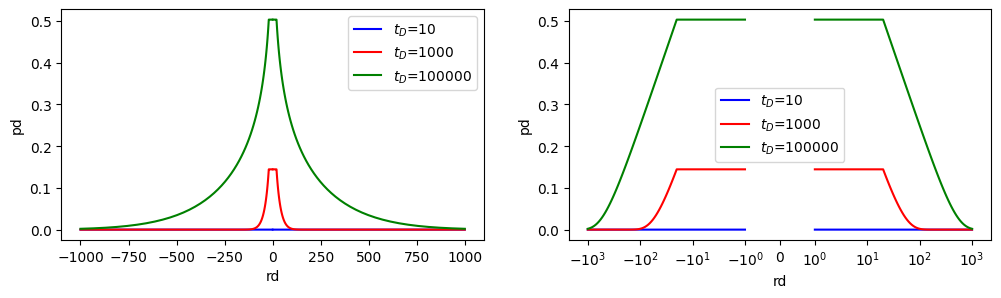

скин-фактор = 0


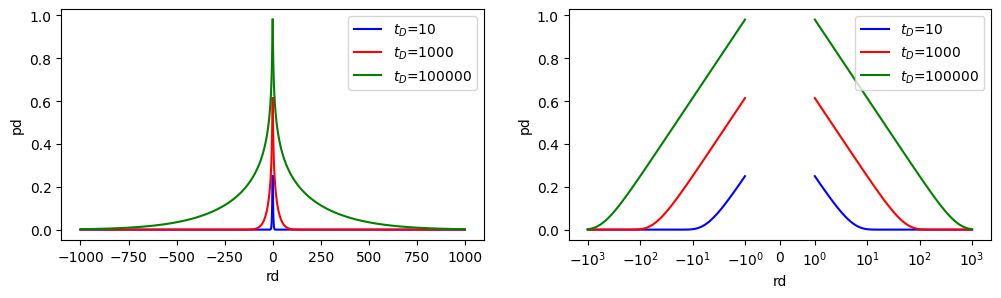

скин-фактор = 3


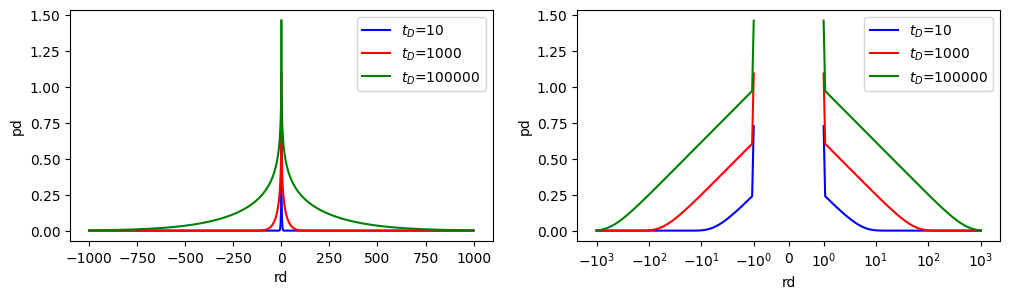

In [3]:
rd_arr = np.logspace(0, 3, 100)
clr = ['b', 'r', 'g']
for skin in [-3,0,3]:
    print(f'скин-фактор = {skin}')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
    i = 0
    for td in [10, 1000, 100000]:
        # при построении используем векторный расчет
        ax1.plot(rd_arr, pd_line_source_ei(td, rd_arr, skin = skin), clr[i], label = f'$t_D$={td}' )
        ax1.plot(-rd_arr, pd_line_source_ei(td, rd_arr, skin = skin), clr[i])
        ax2.plot(rd_arr, pd_line_source_ei(td, rd_arr, skin = skin), clr[i], label = f'$t_D$={td}' )
        ax2.plot(-rd_arr, pd_line_source_ei(td, rd_arr, skin = skin), clr[i] )
        i = i + 1
    #plt.title("Решение уравнения линейного стока для td = {}".format(td))
    ax1.set_xlabel("rd")
    ax1.set_ylabel("pd")
    ax2.set_xlabel("rd")
    ax2.set_ylabel("pd")
    ax1.legend()
    ax2.legend()
    ax2.set_xscale('symlog', linthresh=1, linscale=0.6)
    plt.show()

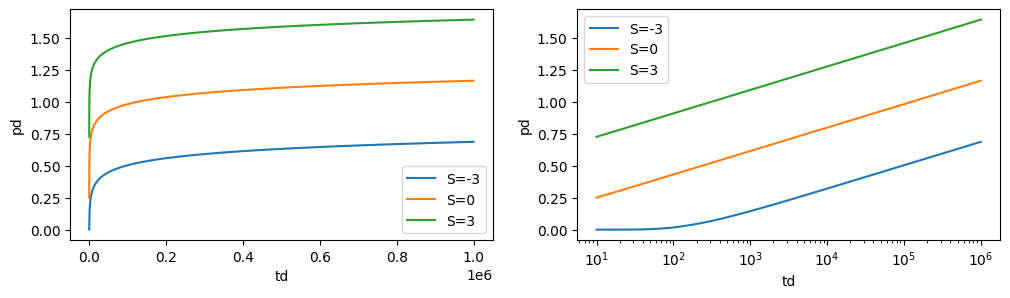

In [4]:
td_arr = np.logspace(1, 6, 100)
rd = 1
# при построении используем векторный расчет
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
for skin in [-3,0,3]:
    ax1.plot(td_arr, pd_line_source_ei(td_arr, rd, skin = skin), label = f'S={skin}' )
    ax2.plot(td_arr, pd_line_source_ei(td_arr, rd, skin = skin), label = f'S={skin}' )
#plt.title("Решение уравнения линейного стока для td = {}".format(td))
ax1.set_xlabel("td")
ax1.set_ylabel("pd")
ax2.set_xlabel("td")
ax2.set_ylabel("pd")
ax2.set_xscale('log')
ax1.legend()
ax2.legend()
plt.show()

# 5. Построение графиков решения в размерных координатах <a class="anchor" id="325"></a>


In [5]:
def p_line_source_ei_atma(t_hr, r_m, 
                          q_sm3day, k_mD=10, h_m=10, phi=0.2, mu_cP=1, b_m3m3=1.2, ct_1atm=1e-5, rw_m=0.1, p_init_atma=250, skin=0):
    q_ref_sm3day = 1
    td = wf.td_from_t(t_hr, k_mD=k_mD, phi=phi, mu_cP=mu_cP, ct_1atm=ct_1atm, rw_m=rw_m)
    rd = wf.rd_from_r(r_m, rw_m=rw_m)
    qd = wf.qd_from_q(q_sm3day, q_ref_sm3day=q_ref_sm3day)
    pd = pd_line_source_ei(td, rd, qd, skin)
    return wf.p_from_pd_atma(pd, k_mD=k_mD, h_m=h_m, q_sm3day=q_ref_sm3day, b_m3m3=b_m3m3, mu_cP=mu_cP, pi_atma=p_init_atma)

Решение в размерных переменных можно записать как
$$
p\left(r,t\right)=p_i-\frac{18.42q_sB\mu}{kh}\left(-\frac{1}{2} Ei \left(-\frac{\varphi\mu c_tr^2}{0.00144kt}\right)\right) 
\tag{10}
$$


In [6]:
def p_ei_atma(t_hr, r_m, q_sm3day, k_mD=10, h_m=10, phi=0.2, mu_cP=1, b_m3m3=1.2, ct_1atm=1e-5, rw_m=0.1, p_init_atma=250):
    eta = phi * mu_cP * ct_1atm / k_mD
    return p_init_atma + 18.42 * q_sm3day * b_m3m3 * mu_cP / k_mD / h_m * (0.5 * sp.expi(- eta * r_m * r_m / 0.00144 / t_hr))

Хорошо видна воронка депрессии. Если изменить значение времени и перестроить график можно убедиться, что решение будет меняться и воронка депресси будет менять свой размер. Убедиться в этом можно построить сразу много графиков

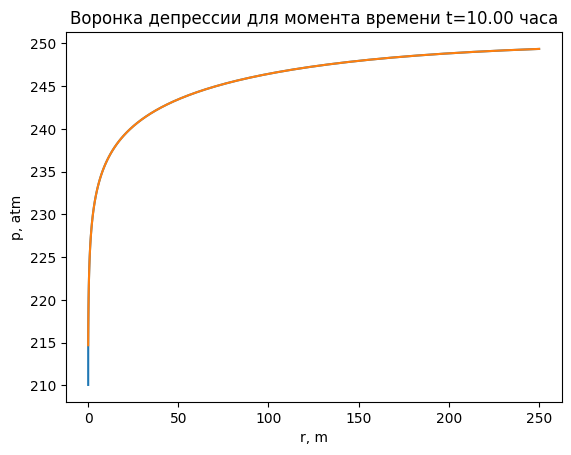

In [7]:
# построим решение для размерных величин
# при переводе величин в размерные полагаемся на значения параметров по умолчанию заданные 
# при определении переводных функций
t_hr = 10
r_arr = np.logspace(np.log10(0.1), np.log10(250), 100)

plt.plot(r_arr, p_line_source_ei_atma(t_hr, r_m=r_arr, q_sm3day=21, skin=1) )
plt.plot(r_arr, p_ei_atma(t_hr, r_m=r_arr, q_sm3day=21) )
plt.title("Воронка депрессии для момента времени t={:.2f} часа".format(t_hr))
plt.xlabel("r, m")
plt.ylabel("p, atm") 
plt.show()

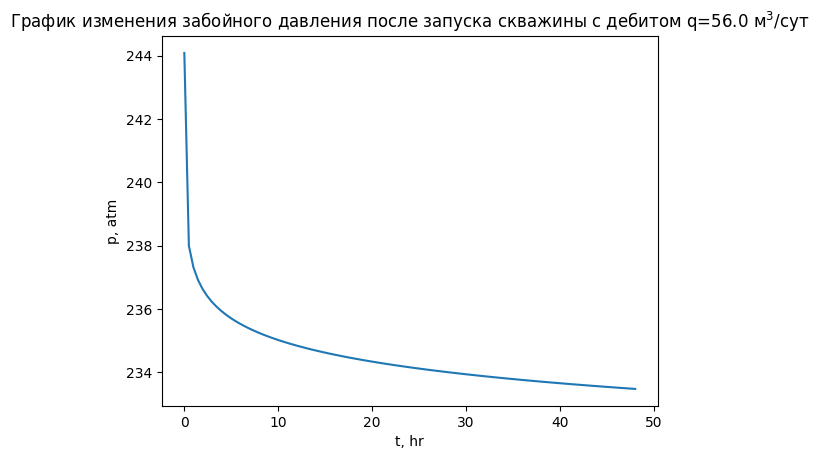

In [8]:
# построим решение для размерных величин
# при переводе величин в размерные полагаемся на значения параметров по умолчанию заданные 
# при определении переводных функций

# зададим диапазон изменения времени
t_arr = np.linspace(0.001, 48, 100)
# переведем в безразмерные координаты
td_arr = wf.td_from_t(t_arr)
rd = 1  # соотвествует забойному давлению
q = 56

# для наглядности проведем преобразования в отдельные переменные. можно было сделать и на месте
# все преобразования и расчеты делаются векторно за счет использования numpy
r = wf.r_from_rd_m(rd)
# проводим расчет
p_arr = wf.p_from_pd_atma(pd_line_source_ei(td_arr,rd), 
                       q_sm3day=q
                      )
# строим графики
plt.plot(t_arr, p_arr )
plt.title("График изменения забойного давления после запуска скважины с дебитом q={:.1f} м$^3$/сут".format(q))
plt.xlabel("t, hr")
plt.ylabel("p, atm")
plt.show()

# 6.Построение графиков для разных моментов времени <a class="anchor" id="326"></a>

Мы можем зациклить расчет распределений давления, и сформировать много кривых на графике matplotlib и потом отобразить их. Получится прикольная картинка.

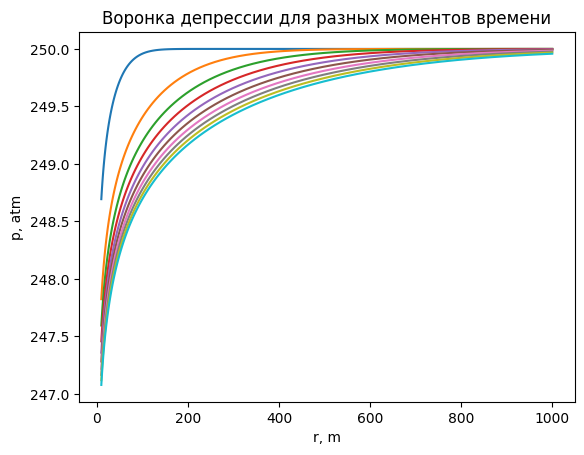

In [9]:
# Пример построения сразу нескольких решений на одном графике
# Зададим массив (итератор) определяющий количество графиков которые мы хотим построить
n=np.linspace(1,100,10)
# зададим диапазон изменения расстояний и количество точек для которых строятся кривые
r_arr_m = np.logspace(1, 3, 100)

# цикл расчета. Полезно понимать тут, что функция Ei будет вызываться число раз равное
# произведению количества графиков на количество точек. 
# для сложных функций это время может оказаться достаточно заметным
for i in n:
    t_hr = 1*i
      # здесь используем расчет заполнения массива с использованием итератора python - 
      # не самый быстрый вариант для этой функции, но работает
    plt.plot(r_arr_m, [wf.p_from_pd_atma(pd_line_source_ei(wf.td_from_t(t_hr), rdi)) for rdi in wf.rd_from_r(r_arr_m)])
plt.title("Воронка депрессии для разных моментов времени")
plt.xlabel("r, m")
plt.ylabel("p, atm")
plt.show()

# 7. Задания для самостоятельной работы <a class="anchor" id="327"></a>

Для совершенствования навыков работы с python выполните следующие задания:

1. Постройте графики зависимости забойного давления от времени в полулогарифмических координатах
2. Сравниет графики распределения давления вокруг скважины с использованием стационарного решения и решения линейного стока